## EE 461P: Data Science Principles  
### Assignment 3 
### Total points: 75
### Due: Thursday, Mar 11, 2021, submitted via Canvas by 11:59 pm  

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UT eID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TAs know.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

### Name(s) and EID(s):
1. Julian Fritz jjf2459
2. 

### Homework group No.: 

# Question 1 : Tensor Playground (15 points)
Visit https://playground.tensorflow.org for this problem

**NOTE** : Make sure to attach screen shots of your network,train and test loss, parameters in the notebook. 
 
From the far right, select "Classification" as the problem type, and select the data set on the top right (alternate colored squares).

Use these settings as the DEFAULT settings for all subquestions: test/training ratio = 50%, Noise = 0, Batch Size = 30, learning rate = 0.03, activation = tanh, one hidden layer with 2 neurons, input as $X_1$, $X_2$ and no Regularization.

1) Use the DEFAULT setting and run two experiments - one using Relu as the activation function and one using the linear activation function. Report the train, test losses for both these experiments at the end of 1000 epochs. What  do you observe in the decision boundaries obtained? Why? (**3 pts**)

2)Using the same DEFAULT setting as above, increase the number of neurons to 3 train the network multiple times(5-10 times), to reset the network use the RESET button left of the PLAY button. What do you observe in the loss values, as well as the decision boundary across the different training runs ? Could you say the training is stable(uniform) across the mutliple runs, if not why. Provide reasoning (**3 pts**)

We will now study the effect of certain variations in the network structure or training, keeping all other aspects the same as in the default configuration specified above, and with tanh as the activation for hidden units.

3) ```Effect of number of hidden units```: Go back to DEFAULT settings and report the train, test losses at the end of 1000 epochs for 4 and 8 neurons in the hidden layer (2 pairs of results). What do you observe regarding the decision boundary as the number of neurons increases? Why? (**3 pts**)

4) ```Effect of learning rate and number of epochs```: Go back to DEFAULT settings and set the activation to be Relu and have four neurons in the hidden layer. Report the train, test losses at the end of 100 epochs and 1000 epochs for learning rates of 10, 0.1, 0.01 and 0.001 (8 pairs of results). What do you observe in the loss curves? Explain. (**3 pts**)

5)Use the same default setting, if you are asked to vary the number of neurons or number of hidden layers for this problem and train the network for 500 epochs with all the other settings constant. i.e you can change only the number of neurons or number of hidden layers which decision you would take, to reduce the test loss (test loss should be at most 0.06). Justify your decisions
and briefly comment on difficulties/tradeoffs, what helps/what doesn't, etc. (**3 pts**)

# Answer 1

# Question 2 - Stochastic Gradient Descent (25 pts)
1. (**5pts**) Using stochastic gradient descent, derive the coefficent updates for all coefficients of the model (assuming squared error as your loss function): 
$$ y = w_0 + w_1x_1 + w_2x_1^{2}x_2 + w_3e^{-x_1}+ w_4log(x_3) $$ 


2. (**20pts**) Write Python code for an SGD solution to the non-linear model$$ y = w_0 + w_1x_1 + w_2x_1^{2}x_2 + w_3e^{-x_1}+ w_4log(x_3) $$   Try to format similarly to scikit-learn's models. The template of the class is given. The init function of the class takes as input the learning_rate, regularization_constant and number of epochs. The fit method must take as input X,y. The _predict_ method takes an X value (optionally, an array of values). 

  **a**) Use your new gradient descent regression to predict the data given in ```'samples.csv'```, for 15 epochs, using learning rates: ```[0, .0001, .001, .01, 0.1, 1, 10, 100]``` and regularization (ridge regression) parameters: ```[0,10,100]```. (**13pts**)

  **b**) Plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) for the two best combinations of learning_rate and regularization for SGD. Here "best" means lowest MSE at the end of 15 epochs. (**5pts**)

  ```NOTE``` : In this setting there is no validation/test data, and stopping after a pre-determined number of epochs is an example of an "early stopping" approch to avoid overfitting.(This approach is not ideal, but is sometimes employed in the absence of a validation dataset).

  **c**) Also report the MSE at the end of 15 epochs that you obtained for these two "best" combinations. (**2pts**)


In [ ]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class Regression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        
    def sgd(self, gradient):
        self.coef # = please fill this to update self.coef using SGD
    
        
    def fit(self, X, y, update_rule='sgd', plot=False):
        mse = []
        coefs = []
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                # Compute error
                   #please fill this
                # Compute gradients
                    #please fill this
               
                # Update weights
                self.sgd(gradient)

            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)         
            mse.append(np.mean(residuals**2))
            
        self.lowest_mse = mse[-1]
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.plot(range(self.n_epoch),coefs[:,4],label='w4')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 5))
        x[:,0] = 1
        x[:,1] = (X[:,0])
        x[:,2] = (X[:,0]**2)*X[:,1]
        x[:,3] = np.exp(-X[:,0])
        x[:,4] = np.log(X[:,2])
        
        return x
        
    #def linearPredict(self, X):  
        #compute dot product of self.coef and X
        
        

In [ ]:
df = pd.read_csv("samples.csv",index_col=0)
X = np.array([df['x1'].values, df['x2'].values,df['x3'].values]).T
y = df['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]
df

,x1,x2,x3,y
0,0.050816,0.295442,0.305858,2.517320
1,0.038277,0.606797,0.855657,2.537360
2,0.761375,0.421169,0.232194,2.047563
3,0.763610,0.537137,0.820876,2.095084
4,0.525309,0.859292,0.161640,2.164664
...,...,...,...,...
495,0.396302,0.610169,0.291709,2.166131
496,0.204226,0.393554,0.828117,2.313066
497,0.970607,0.512186,0.109008,2.161382
498,0.503045,0.877230,0.816781,2.169543


# Answer 2

# Question 3: Compute the weights (20 pts)

For the given network, $i$, $W$ and $O$ represent the inputs, weights and output respectively and let $l$ be the learning rate.

Activation: Logistic

Loss: Squared Loss

Q: Derive the equations to update the values of $w5$ and $w1$ after one iteration of backpropagation.

![](https://drive.google.com/uc?id=1GvqRyv_cgS9xIcElF67UtlGoZyHPCHzL)

# Answer 3

### For $w5$:  

$$ w5^* = w5 - l * \frac{\delta Error}{\delta w5}  $$   

Chain Rule:
$$ \frac{\delta Error}{\delta w5} = \frac{\delta Error}{\delta O} * \frac{\delta O}{\delta w5} $$     

$$ \frac{\delta Error}{\delta O} = \frac{\delta (O - target)^2}{\delta O} = 2 (O - target)    $$   

O is our output, following the diagram and using logistic activation function on h1, h2 and h3:   
$$ O = \frac{1}{1 + e^{-(i1w1+i2w3)}} * w5 + \frac{1}{1 + e^{-(i1w7+i2w8)}} + \frac{1}{1 + e^{-(i1w2+i2w4)}} * w6  $$ 

Therefore:
$$ \frac{\delta O}{\delta w5} =  \frac{1}{1 + e^{-(i1w1+i2w3)}}  $$    

Plugging them in:
$$ \frac{\delta Error}{\delta w5} = 2 (O - target) * \frac{1}{1 + e^{-(i1w1+i2w3)}} $$     

Plugging that into the first equation:
$$ w5^* = w5 - 2l * (O - target) * \frac{1}{1 + e^{-(i1w1+i2w3)}}  $$     
     


### Now for $w1$:
$$ w1^* = w1 - l * \frac{\delta Error}{\delta w1}  $$ 

Chain Rule:
$$ \frac{\delta Error}{\delta w1} = \frac{\delta Error}{\delta O} * \frac{\delta O}{\delta w1} $$

Once again:
$$ \frac{\delta Error}{\delta O} = \frac{\delta (O - target)^2}{\delta O} = 2 (O - target)    $$

Once again:   
$$ O = \frac{1}{1 + e^{-(i1w1+i2w3)}} * w5 + \frac{1}{1 + e^{-(i1w7+i2w8)}} + \frac{1}{1 + e^{-(i1w2+i2w4)}} * w6  $$

Taking partial derivative w.r.t. $w1$ this time:
$$ \frac{\delta O}{\delta w1} =  \frac{w5*i1*e^{-(i1w1+i2w3)}}{(1 + e^{-(i1w1+i2w3)})^2}  $$

Plugging them in:
$$ \frac{\delta Error}{\delta w1} = 2 (O - target) * \frac{w5*i1*e^{-(i1w1+i2w3)}}{(1 + e^{-(i1w1+i2w3)})^2} $$ 

Plugging that into the first equation:
$$ w1^* = w1 - 2l * (O - target) * \frac{w5*i1*e^{-(i1w1+i2w3)}}{(1 + e^{-(i1w1+i2w3)})^2}  $$    

# Question 4 - Multi-layer perceptron Regressor (15 pts)
In this question, you will explore the application of Multi-layer Perceptron (MLP) regression using sklearn package in Python;
http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html.


We will use the OpenCL gemm kernel performance prediction dataset for this problem; https://archive.ics.uci.edu/ml/datasets/SGEMM+GPU+kernel+performance.

The following code will pre-process the data and split the data into training and test sets using [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with **random state 30** and **test_size = 0.25**.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import (train_test_split,KFold)
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import glob
%matplotlib inline

data = pd.read_csv('sgemm_product.csv') 
data['target'] = 0.25*(data['Run1 (ms)'] + data['Run2 (ms)']+ data['Run3 (ms)'] + data['Run4 (ms)'])
y = data['target']
y = y.to_numpy()
X = data.drop(['target','Run1 (ms)', 'Run2 (ms)', 'Run3 (ms)', 'Run4 (ms)'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=30)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(181200, 14) (181200,) (60400, 14) (60400,)


We also want to use [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Instead of fitting a model on the original data, we use StandardScaler to center each feature ([Example](http://scikit-learn.org/stable/auto_examples/applications/plot_prediction_latency.html#sphx-glr-auto-examples-applications-plot-prediction-latency-py)). Also remember that when we have training and testing data, we fit preprocessing parameters on training data and apply them to all testing data. You should scale only the features (independent variables), not the target variable y.

1) (5pts) Use [sklearn.neural_nework.MLPRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor) to do a 5-fold cross validation using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold). The cross validation must be performed on the **training data**. Use following parameter settings for MLPRegressor:

    activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,
    batch_size=30, learning_rate_init = 0.005
    
Now, build four MLP Regressors containing one hidden layer with 2, 10, 20 and 30 hidden units respectively. To do that in scikit-learn, the following syntax needs to be used:
    
   (a) *hidden_layer_sizes = (2,)* 
   
   (b) *hidden_layer_sizes = (10,)*
   
   (c) *hidden_layer_sizes = (20,)*
   
   (d) *hidden_layer_sizes = (30,)*
   
   Report the average Root Mean Squared Error (RMSE) value based on your 5-fold cross validation for each model.
   
   
2) (5pts) Now, using the same parameters used in part 1), train MLPRegressor models on the entire training set and report the RMSE score for both the training and testing sets (again, use StandardScaler). Which of the four models ((a)-(d)) performs the best? Briefly analyze and discuss the results, commenting on the number of hidden units.


3) (5pts) MLPRegressor has a built-in attribute *loss\_curve\_* which returns the loss at each epoch (misleadingly referred to as "iteration" in scikit documentation, though they use epoch in the actual code!). For example, if your model is named as *my_model* you can call it as *my\_model.loss\_curve\_* ([example](http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html#sphx-glr-auto-examples-neural-networks-plot-mlp-training-curves-py)). Plot three curves using the following three conditions (a, b, c) in one figure, where *X-axis* is epoch  number and *Y-axis* is squared root of *loss\_curve\_*:

   (a) *hidden_layer_sizes = (1,)* 
   
   (b) *hidden_layer_sizes = (5,)*
   
   (c) *hidden_layer_sizes = (10,)*

# Answer 4

In [5]:
# 1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

n_splits = 5
kf = KFold(n_splits=n_splits)

hl_sizes = [2, 10, 20, 30]
for i in hl_sizes:
    total_rmse = 0
    for train_index, test_index in kf.split(X_train_scaled):
        X_train_fold, X_test_fold = X_train_scaled[train_index], X_train_scaled[test_index]
        y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
        
        MLPreg = MLPRegressor(hidden_layer_sizes=(i,), activation = 'tanh', solver = 'sgd', learning_rate='constant', 
                          random_state=42, batch_size=30, learning_rate_init = 0.005).fit(X_train_fold,y_train_fold)
        
        rmse = mean_squared_error(y_test_fold, MLPreg.predict(X_test_fold), squared=False)
        total_rmse += rmse
    avg_rmse = total_rmse / n_splits
    print("RMSE is {} for hidden layer size {}".format(avg_rmse,i))


RMSE is 229.8053295764077 for hidden layer size 2
RMSE is 178.55643955902715 for hidden layer size 10
RMSE is 181.09629087164166 for hidden layer size 20
RMSE is 153.46570494089562 for hidden layer size 30


In [3]:
# 2)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

hl_sizes = [2, 10, 20, 30]
for i in hl_sizes:
    MLPreg = MLPRegressor(hidden_layer_sizes=(i,), activation = 'tanh', solver = 'sgd', learning_rate='constant', 
                          random_state=42, batch_size=30, learning_rate_init = 0.005).fit(X_train_scaled,y_train)
    rmse_test = mean_squared_error(y_test, MLPreg.predict(X_test_scaled), squared=False)
    rmse_train = mean_squared_error(y_train, MLPreg.predict(X_train_scaled), squared=False)
    print("Test RMSE is {} for hidden layer size {}".format(rmse_test,i))
    print("Train RMSE is {} for hidden layer size {}".format(rmse_train,i))


Test RMSE is 211.4572621223227 for hidden layer size 2
Train RMSE is 215.73189791612663 for hidden layer size 2
Test RMSE is 145.23367136134348 for hidden layer size 10
Train RMSE is 149.17818926125327 for hidden layer size 10
Test RMSE is 205.99829777415934 for hidden layer size 20
Train RMSE is 209.52739324613103 for hidden layer size 20
Test RMSE is 173.18066043259884 for hidden layer size 30
Train RMSE is 177.58002027206086 for hidden layer size 30


Layer size 10 (model b) performed the best, but it's interesting that the error went down from model a to b, then it went up from b to c, then back down from c to d. Clearly increasing the number of hidden units does not appear to have a monotonic effect on the test/train error. Also worth noting that the Train RMSE was ~4 more than the Test RMSE for every model, which seems like a strange coincidence, and also the fact that the training error was larger than the testing error could mean our models are underfitting a bit.

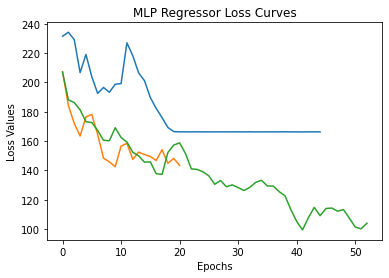

In [9]:
#3)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

hl_sizes = [1, 5, 10]
for i in hl_sizes:
    MLPreg = MLPRegressor(hidden_layer_sizes=(i,), activation = 'tanh', solver = 'sgd', learning_rate='constant', 
                          random_state=42, batch_size=30, learning_rate_init = 0.005).fit(X_train_scaled,y_train)
    loss_curve = MLPreg.loss_curve_
    
    plt.plot(np.sqrt(loss_curve))
    plt.title("MLP Regressor Loss Curves")
    plt.xlabel("Epochs")
    plt.ylabel("Loss Values")